In [58]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
# Path to the downloaded shapefile
# you can download 'shapefile_paths':
# https://www.census.gov/cgi-bin/geo/shapefiles/index.php

shapefile_path = './files/shapefiles/tl_2023_us_county.zip'



# Read the shapefile into a GeoDataFrame
gdf = gpd.read_file(shapefile_path)

# Display the GeoDataFrame
gdf.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,GEOIDFQ,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,0500000US31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477563029,10772508,+41.9158651,-096.7885168,"POLYGON ((-96.55516 41.91587, -96.55515 41.914..."
1,53,069,01513275,53069,0500000US53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680980771,61564427,+46.2946377,-123.4244583,"POLYGON ((-123.72755 46.2645, -123.72756 46.26..."
2,35,011,00933054,35011,0500000US35011,De Baca,De Baca County,06,H1,G4020,None,None,None,A,6016818946,29090018,+34.3592729,-104.3686961,"POLYGON ((-104.89337 34.08894, -104.89337 34.0..."
3,31,109,00835876,31109,0500000US31109,Lancaster,Lancaster County,06,H1,G4020,339,30700,None,A,2169269688,22850324,+40.7835474,-096.6886584,"POLYGON ((-96.68493 40.5233, -96.69219 40.5231..."
4,31,129,00835886,31129,0500000US31129,Nuckolls,Nuckolls County,06,H1,G4020,None,None,None,A,1489645187,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.2737 40.1184, -98.27374 40.1224,..."


# COUNTY DOESN'T LOOK VERY CLEAN ON MAP - SEE STATE

In [ ]:
pct_change = pd.read_csv('./files/data/selected_change_10_20.csv')
pct_change['GeoFips'] = pd.to_numeric(pct_change['GeoFips'])
gdf['GEOID'] = pd.to_numeric(gdf['GEOID'])
merged = gdf.merge(pct_change, left_on='GEOID', right_on='GeoFips')
merged.head(2)

,STATEFP,COUNTYFP,COUNTYNS,GEOID,GEOIDFQ,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,...,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,GeoFips,GeoName,2010,2022
0,31,039,00835841,31039,0500000US31039,Cuming,Cuming County,06,H1,G4020,...,A,1477563029,10772508,+41.9158651,-096.7885168,"POLYGON ((-96.55516 41.91587, -96.55515 41.914...",31039,"Cuming, NE",NaN,0.559797
1,53,069,01513275,53069,0500000US53069,Wahkiakum,Wahkiakum County,06,H1,G4020,...,A,680980771,61564427,+46.2946377,-123.4244583,"POLYGON ((-123.72755 46.2645, -123.72756 46.26...",53069,"Wahkiakum, WA",NaN,0.572847


c:\Users\mttca\nwuai\course_materials\class_work\projects\Project_1\.venv\lib\site-packages\matplotlib\colors.py:1404: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)


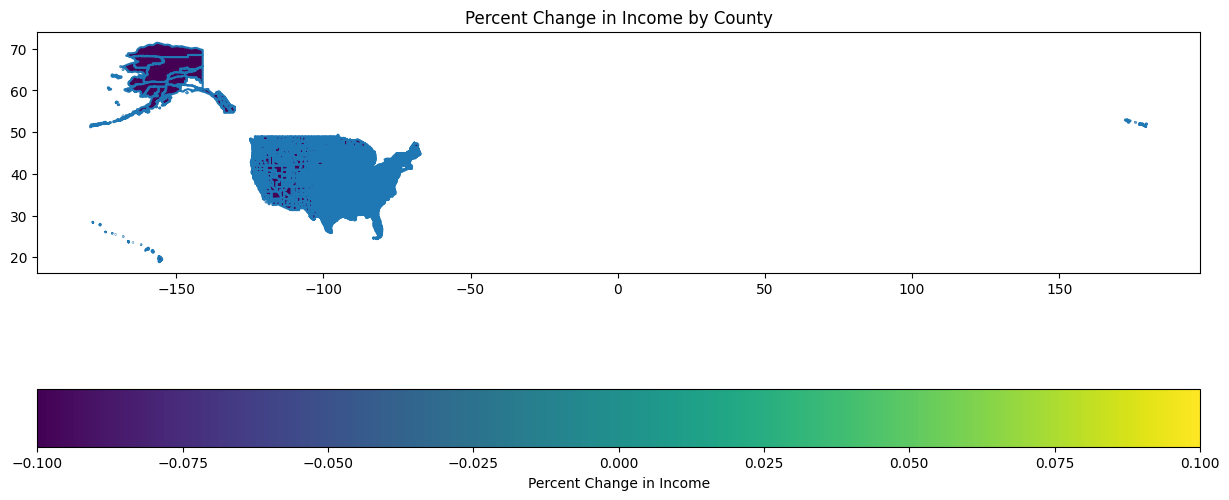

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.boundary.plot(ax=ax)
merged.plot(column='2022', ax=ax, legend=True,
            legend_kwds={'label': "Percent Change in Income",
                         'orientation': "horizontal"})
plt.title('Percent Change in Income by County')
plt.savefig('./files/Maps/county_pct_change_20102022.png')
plt.show()

## By State

In [ ]:
# STATE

state_shapefile_path = './files/shapefiles/tl_2023_us_state.zip'

# Read the shapefile into a GeoDataFrame
state_gdf = gpd.read_file(state_shapefile_path)

state_pct_change = pd.read_csv('./files/data/state_selected_change_10_20.csv')
state_merged = state_gdf.merge(state_pct_change, left_on='NAME', right_on='GeoName')
state_gdf.head()

,REGION,DIVISION,STATEFP,STATENS,GEOID,GEOIDFQ,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,3,5,54,01779805,54,0400000US54,WV,West Virginia,00,G4000,A,62266499712,489003081,+38.6472854,-080.6183274,"POLYGON ((-77.75438 39.33346, -77.75422 39.333..."
1,3,5,12,00294478,12,0400000US12,FL,Florida,00,G4000,A,138963763779,45970528648,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,2,3,17,01779784,17,0400000US17,IL,Illinois,00,G4000,A,143778366814,6216688589,+40.1028754,-089.1526108,"POLYGON ((-87.89243 38.28285, -87.89334 38.282..."
3,2,4,27,00662849,27,0400000US27,MN,Minnesota,00,G4000,A,206244555303,18937471947,+46.3159573,-094.1996043,"POLYGON ((-95.31991 48.99892, -95.31778 48.998..."
4,3,5,24,01714934,24,0400000US24,MD,Maryland,00,G4000,A,25151736098,6979330958,+38.9466584,-076.6744939,"POLYGON ((-75.756 39.24607, -75.75578 39.24334..."


### Plotting By State

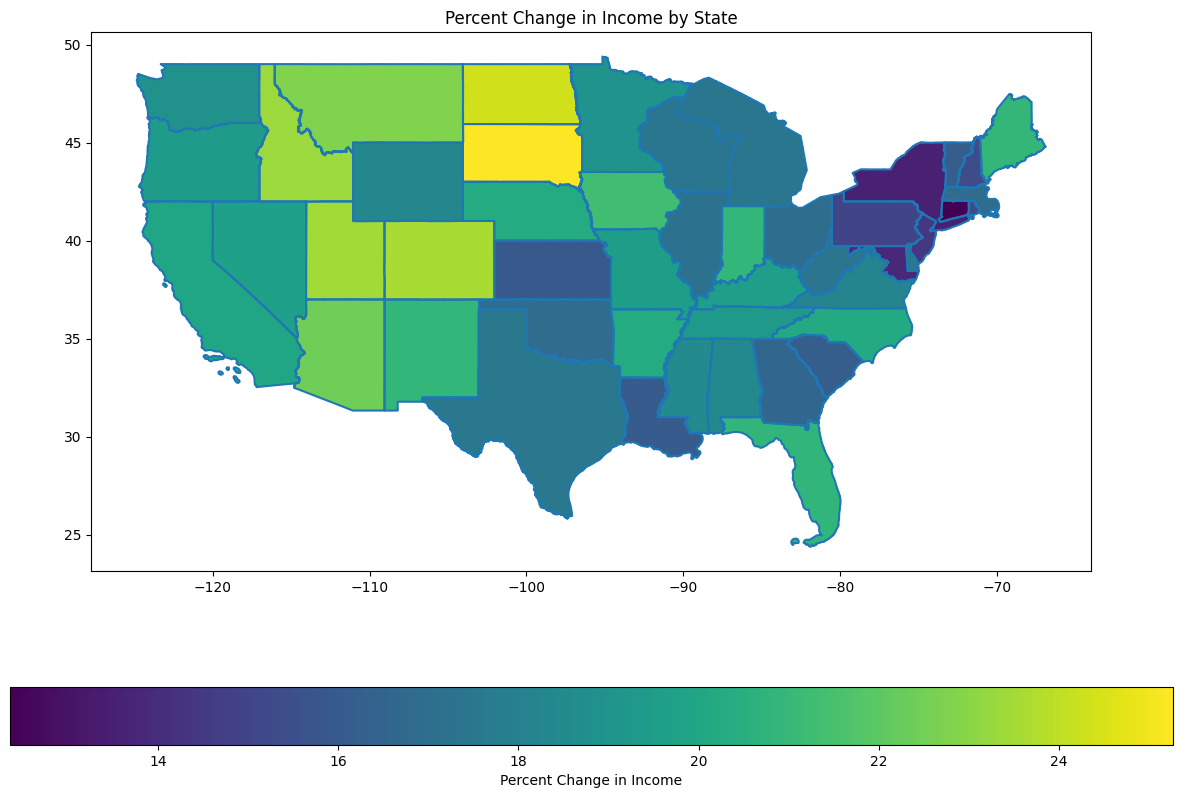

In [ ]:


fig, ax = plt.subplots(1, 1, figsize=(15, 10))
state_merged.boundary.plot(ax=ax)
state_merged.plot(column='2022', ax=ax, legend=True,
            legend_kwds={'label': "Percent Change in Income",
                         'orientation': "horizontal"})
plt.title('Percent Change in Income by State')
plt.savefig('./files/Maps/state_pct_change_20192022.png')
plt.show()